In [23]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [24]:
import numpy as np
import pandas as pd

In [25]:
import datetime as dt
from sqlalchemy.sql import func

# Reflect Tables into SQLAlchemy ORM

In [26]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [27]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [28]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [30]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [31]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [32]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [ ]:
# equivaleint sql query
#Select max(date) from measurement;

In [35]:
# func is a library with aggregation functions in SQL alchemy (sum, count, avg, max, min)
max_date = session.query(func.max(measurement.date)).one()[0]
print(f"The max date in the measurement table is  {max_date}")

The max date in the measurement table is  2017-08-23


In [39]:
from datetime import timedelta
one_year_ago = dt.datetime.strptime(max_date, "%Y-%m-%d") - timedelta(days = 365)
one_year_ago

datetime.datetime(2016, 8, 23, 0, 0)

# Exploratory Climate Analysis

In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# date = dt.datetime(2016, 12, 31)  

last_12_mos = session.query(measurement.prcp).\
    filter(measurement.date >= one_year_ago).filter(measurement.prcp <= max_date).all()
print(last_12_mos)

[(0.08,), (0.08,), (0.0,), (0.0,), (0.01,), (0.0,), (0.0,), (0.13,), (0.0,), (0.0,), (0.0,), (0.03,), (0.05,), (0.0,), (0.03,), (0.0,), (0.05,), (0.0,), (0.02,), (1.32,), (0.42,), (0.06,), (0.05,), (0.0,), (0.0,), (0.0,), (0.0,), (0.02,), (0.0,), (0.0,), (0.0,), (0.06,), (0.02,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.01,), (0.0,), (0.0,), (0.0,), (0.05,), (0.15,), (0.01,), (0.0,), (0.03,), (0.0,), (0.0,), (0.0,), (0.0,), (0.24,), (0.03,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.07,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.03,), (0.05,), (0.01,), (0.13,), (0.14,), (0.05,), (0.05,), (0.05,), (0.0,), (0.01,), (0.0,), (0.14,), (0.12,), (0.03,), (0.0,), (0.03,), (0.43,), (0.02,), (0.0,), (0.03,), (0.52,), (0.05,), (0.04,), (0.01,), (0.05,), (0.03,), (0.0,), (0.0,), (0.01,), (0.13,), (0.01,), (0.0,), (0.0,), (0.01,

In [44]:
# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(f"The date 1 year ago from the last data point is {last_date}")


# Perform a query to retrieve the data and precipitation scores
data_and_prcp = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_ago)\
    .filter(measurement.prcp <= max_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
data_and_prcp_df = pd.DataFrame(data_and_prcp)
# data_and_prcp_df

The date 1 year ago from the last data point is ('2017-08-23',)


In [47]:
# Sort the dataframe by date
sorted_by_date = data_and_prcp_df.copy()

sorted_by_date['date'] = [ dt.datetime.strptime(d, "%Y-%m-%d") for d in sorted_by_date['date'] ]



sorted_by_date = sorted_by_date.sort_values('date')
sorted_by_date

,date,prcp
0,2016-08-24,0.08
1024,2016-08-24,1.22
700,2016-08-24,2.28
1688,2016-08-24,1.45
358,2016-08-24,2.15
...,...,...
2013,2017-08-22,0.50
357,2017-08-23,0.00
1336,2017-08-23,0.08
963,2017-08-23,0.00


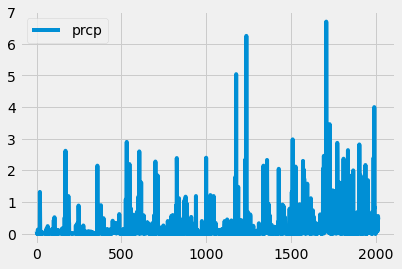

In [49]:
# Use Pandas Plotting with Matplotlib to plot the data
df = pd.DataFrame(data_and_prcp_df, columns=['prcp', 'date'])
df.plot(kind="line")
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_by_date.describe()


,prcp
count,4.0000
mean,0.1325
std,0.2150
min,0.0000
25%,0.0000
50%,0.0400
75%,0.1725
max,0.4500


In [13]:
# Design a query to show how many stations are available in this dataset?
total_stations = session.query(station).filter(station.id).count()
total_stations

9

In [52]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
act_station = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
act_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [34]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
lowest_temp = session.query(func.min(measurement.tobs)).\
filter(measurement.station == 'USC00519281').all()

highest_temp = session.query(func.max(measurement.tobs)).\
filter(measurement.station == 'USC00519281').all()

avg_temp = session.query(func.avg(measurement.tobs)).\
filter(measurement.station == 'USC00519281').all()

print(f"The lowest temperature is {lowest_temp}, the highest temperature is {highest_temp}, and the average temperature is {avg_temp}")

The lowest temperature is [(54.0,)], the highest temperature is [(85.0,)], and the average temperature is [(71.66378066378067,)]


In [54]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

USC00519281_2016 = dt.date(2017, 8, 23) - dt.timedelta(days=365)
USC00519281_2016
     
last_12_mos = session.query(measurement.tobs).\
filter(measurement.date >= '2016-08-23').\
filter(measurement.tobs).\
order_by(measurement.date.desc()).all()
pd.DataFrame(last_12_mos)

,tobs
0,81.0
1,82.0
2,82.0
3,76.0
4,82.0
...,...
2225,80.0
2226,80.0
2227,80.0
2228,77.0


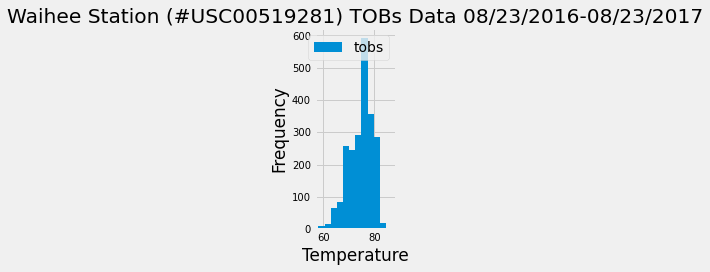

In [56]:
temp_df = pd.DataFrame(last_12_mos, columns=['TOBs'])
# temp_df.set_index('Date', inplace=True, )
# temp_df.head(10)

temp_df.plot(kind="hist", bins=12,title='Waihee Station (#USC00519281) TOBs Data 08/23/2016-08/23/2017',stacked=True,fontsize=10)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.legend(['tobs'],loc='best')
plt.grid(b=True)
plt.tight_layout()
plt.show()

## Bonus Challenge Assignment

In [16]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

NameError: name 'Measurement' is not defined

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
